# BIL 366 Data Mining: Homework-2


Ali Fırat Özel - 18120205038

In [1]:
import pandas as pd
from scipy.spatial import distance

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()
df21 = pd.read_csv(url2021)
df21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

In [2]:
df20

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,6.0,14.0,2.0,5.0,0.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,5.0,10.0,5.0,8.0,-2.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-18,4.0,6.0,11.0,4.0,8.0,-2.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-19,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167652,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-27,-93.0,NaN,NaN,NaN,-59.0,21.0
167653,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-28,-43.0,35.0,NaN,-33.0,-30.0,11.0
167654,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-29,-46.0,36.0,NaN,-34.0,-29.0,12.0
167655,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-30,-48.0,17.0,NaN,-27.0,-26.0,11.0


In [3]:
df21

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-01,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-02,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-03,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-04,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-05,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158425,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-01,-12.0,101.0,NaN,-17.0,-15.0,3.0
158426,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-02,-14.0,65.0,NaN,-9.0,-17.0,1.0
158427,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-03,-20.0,NaN,NaN,-19.0,-24.0,2.0
158428,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-04,-8.0,111.0,NaN,-4.0,-15.0,1.0


In [249]:
# 1. Soru Cevabı
#direkt dataframe üzerinde işlem yaptırdık
df20.dropna(axis=1, how='all', inplace=True)
df21.dropna(axis=1, how='all', inplace=True)

In [3]:
#tüm değerlerde işlem yapabilmek için istenirse alınabilir zorunlu değil ben kullanmadım
df20.fillna(0, inplace=True)
df21.fillna(0, inplace=True)

In [250]:
#2020 indexleri aya dönüştürdük
date_series = pd.to_datetime(df20['date'])
date_index = pd.DatetimeIndex(date_series.values).month
df20.set_index(date_index, inplace=True)
df20.index.name = "ay"

#2020: aylara göre ortalamaların bulunduğu dataframe
mean20 = df20.groupby("ay").mean()
mean20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2 to 12
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   retail_and_recreation_percent_change_from_baseline  11 non-null     float64
 1   grocery_and_pharmacy_percent_change_from_baseline   11 non-null     float64
 2   parks_percent_change_from_baseline                  11 non-null     float64
 3   transit_stations_percent_change_from_baseline       11 non-null     float64
 4   workplaces_percent_change_from_baseline             11 non-null     float64
 5   residential_percent_change_from_baseline            11 non-null     float64
dtypes: float64(6)
memory usage: 616.0 bytes


In [251]:
#2021 indexleri aya dönüştürdük
date_series = pd.to_datetime(df21['date'])
date_index = pd.DatetimeIndex(date_series.values).month
df21.set_index(date_index, inplace=True)
df21.index.name = "ay"

#2021: aylara göre ortalamaların bulunduğu dataframe
mean21 = df21.groupby("ay").mean()
mean21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   retail_and_recreation_percent_change_from_baseline  10 non-null     float64
 1   grocery_and_pharmacy_percent_change_from_baseline   10 non-null     float64
 2   parks_percent_change_from_baseline                  10 non-null     float64
 3   transit_stations_percent_change_from_baseline       10 non-null     float64
 4   workplaces_percent_change_from_baseline             10 non-null     float64
 5   residential_percent_change_from_baseline            10 non-null     float64
dtypes: float64(6)
memory usage: 560.0 bytes


In [252]:
# 2. Soru Bu soru için aylara göre mean değerleri yukarıda oluşturuldu ancak tam anlamadığımdan yapamadım
# df20 = df20.fillna(0)

#Distance ölçümü için 
#covariance matrisini numpy.cov() fonksiyonu, 
#inverse (tersini) numpy.linalg.inv() fonksiyonu 
#ve aşağıdaki scipy fonksiyonunu kullanabilirsiniz: 
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html 
import numpy as np #np.cov(), np.linalg.inv()
from scipy.spatial import distance

def val_mean(x = 0, y = 0):
    if np.isnan(x) or np.isnan(y):
        return np.NaN
    return (x + y) / 2

    

mean20_21 = []
for month in range(12):
    mean20_21.append([])
    for column in range(len(mean20.columns)):
        try:
            mean20_21[month].append(val_mean(mean20.iloc[:, column].loc[month + 1], mean21.iloc[:, column].loc[month + 1]))
        except:
            mean20_21[month].append(np.NaN)


# mean20_21 = np.nan_to_num(np.matrix(mean20_21))
# mean20_21_T = mean20_21.T
# cov = np.cov(mean20_21_T)
# inv = np.linalg.inv(cov)
# inv

# print("normal\n",mean20_21)
# print("Transpose\n",mean20_21_T)


arr20 = np.matrix(mean20.values.T)
arr21 = np.matrix(mean21.values.T)
print("1: " , np.shape(arr20))
cov = np.cov(arr20)
print("2: " , np.shape(cov))
inv = np.linalg.inv(cov)

#distance.mahalanobis(np.array(mean20.iloc[1,:].values), np.array(mean20.iloc[:, 1].values), inv)


1:  (6, 11)
2:  (6, 6)


In [253]:
import numpy as np 
from scipy.spatial import distance

#3. soru için bazı yardımcı fonksiyonlar
#print ederken sıra sayısını belirtmek için yardımcı fonksiyon
def ordinal(n):
    n = int(n)
    suffix = ['th', 'st', 'nd', 'rd', 'th'][min(n % 10, 4)]
    if 11 <= (n % 100) <= 13:
        suffix = 'th'
    return str(n) + suffix

#mesafeden benzerlik değeri çıkaran yardımcı fonksiyon
def sim_from_dist(dist, maxDist):
    if np.isnan(dist):
        return np.NaN
    return 1 - dist/maxDist

#bu değeri birçoğu döngüde sınır olarak kullanacağız
months = 12

In [254]:
#3.a Soru Euclidean Similarity

#Euclidean Distances
euclidean_dist = []

for month in range(months):
    euclidean_dist.append([])
    for column in range(len(mean20.columns)):
        # aranan ay için sütun bulunamazsa o ayki değerleri nan olarak doldur
        try:
            euclidean_dist[month].append(distance.euclidean(mean20.iloc[:,column].loc[month + 1], mean21.iloc[:,column].loc[month + 1]))
        
        except:
            euclidean_dist[month].append(np.NaN)

print("Aylara ve Sütunlara Göre Euclidean Distance Değerleri\n", np.round(np.matrix(euclidean_dist), 3), "\n")


Aylara ve Sütunlara Göre Euclidean Distance Değerleri
 [[       nan        nan        nan        nan        nan        nan]
 [4.3208e+01 7.5920e+00 2.7297e+01 2.4382e+01 3.5265e+01 1.0477e+01]
 [3.1500e+00 2.9116e+01 1.8660e+00 2.4280e+00 1.2390e+00 4.4000e-02]
 [2.7647e+01 4.7976e+01 2.8254e+01 3.6807e+01 2.3747e+01 9.6940e+00]
 [1.4371e+01 2.8869e+01 1.6871e+01 2.6237e+01 7.9080e+00 5.0600e+00]
 [2.0008e+01 3.5570e+01 7.4240e+00 2.5549e+01 1.3000e-02 4.0280e+00]
 [3.3843e+01 4.6449e+01 3.1233e+01 4.2300e+01 6.5540e+00 2.7460e+00]
 [3.5723e+01 4.9190e+01 1.2954e+01 3.3523e+01 8.1600e+00 1.4370e+00]
 [3.7985e+01 5.2585e+01 1.3173e+01 3.7610e+01 1.0304e+01 4.0450e+00]
 [3.6506e+01 4.1495e+01 1.1478e+01 3.2720e+01 1.0122e+01 4.7980e+00]
 [       nan        nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan]] 



In [255]:
# Euclidean Similarity Değerleri 
# nan değerler ignore edilerek max değeri bul
euclidean_max_dist = np.nanmax(euclidean_dist)
euclidean_sim = []
for month in range(months):
    euclidean_sim.append([])
    for column in range(len(mean20.columns)):
        #her bir aya göre sütunların 2020, 2021 benzerliklerini buluyoruz
        euclidean_sim[month].append(sim_from_dist(euclidean_dist[month][column], euclidean_max_dist))

# herbir sütunun similarity değeri için transpoz aldık
euclidean_sim_columns = np.array(euclidean_sim).T
for column in range(len(mean20.columns)):
    #Sütunların similarity değerleri
    print("euclidean similarity of", ordinal(column + 1) + " column between 2020-2021 is: ", str(round(np.nanmean(euclidean_sim_columns[column]) * 100, 4)) + "%")


euclidean similarity of 1st column between 2020-2021 is:  46.6596%
euclidean similarity of 2nd column between 2020-2021 is:  28.4031%
euclidean similarity of 3rd column between 2020-2021 is:  68.1894%
euclidean similarity of 4th column between 2020-2021 is:  44.7338%
euclidean similarity of 5th column between 2020-2021 is:  78.1704%
euclidean similarity of 6th column between 2020-2021 is:  91.0557%


In [256]:
#3.b Soru Manhattan Similarity
# Manhattan distances
manhattan_dist = []

for month in range(months):
    manhattan_dist.append([])
    for column in range(len(mean20.columns)):
        try:
            manhattan_dist[month].append(distance.cityblock(mean20.iloc[:,column].loc[month + 1], mean21.iloc[:,column].loc[month + 1]))
        
        except:
            manhattan_dist[month].append(np.NaN)
print("Aylara ve Sütunlara Göre Manhattan Distance Değerleri\n", np.round(np.matrix(manhattan_dist), 3), "\n")

Aylara ve Sütunlara Göre Manhattan Distance Değerleri
 [[       nan        nan        nan        nan        nan        nan]
 [4.3208e+01 7.5920e+00 2.7297e+01 2.4382e+01 3.5265e+01 1.0477e+01]
 [3.1500e+00 2.9116e+01 1.8660e+00 2.4280e+00 1.2390e+00 4.4000e-02]
 [2.7647e+01 4.7976e+01 2.8254e+01 3.6807e+01 2.3747e+01 9.6940e+00]
 [1.4371e+01 2.8869e+01 1.6871e+01 2.6237e+01 7.9080e+00 5.0600e+00]
 [2.0008e+01 3.5570e+01 7.4240e+00 2.5549e+01 1.3000e-02 4.0280e+00]
 [3.3843e+01 4.6449e+01 3.1233e+01 4.2300e+01 6.5540e+00 2.7460e+00]
 [3.5723e+01 4.9190e+01 1.2954e+01 3.3523e+01 8.1600e+00 1.4370e+00]
 [3.7985e+01 5.2585e+01 1.3173e+01 3.7610e+01 1.0304e+01 4.0450e+00]
 [3.6506e+01 4.1495e+01 1.1478e+01 3.2720e+01 1.0122e+01 4.7980e+00]
 [       nan        nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan]] 



In [257]:
# Manhattan similarities 
manhattan_sim = []
manhattan_max_dist = np.nanmax(manhattan_dist)
for month in range(months):
    manhattan_sim.append([])
    for column in range(len(mean20.columns)):
        #her bir aya göre sütunların 2020, 2021 benzerliklerini buluyoruz
        manhattan_sim[month].append(sim_from_dist(manhattan_dist[month][column], manhattan_max_dist))

# herbir sütunun similarity değeri için transpoz aldık
manhattan_sim_columns = np.array(manhattan_sim).T
for column in range(len(mean20.columns)):
    #Sütunların similarity değerleri
    print(str(column + 1) + "th column manhattan similarity is: ", str(round(np.nanmean(manhattan_sim_columns[column]) * 100, 4)) + "%")


1th column manhattan similarity is:  46.6596%
2th column manhattan similarity is:  28.4031%
3th column manhattan similarity is:  68.1894%
4th column manhattan similarity is:  44.7338%
5th column manhattan similarity is:  78.1704%
6th column manhattan similarity is:  91.0557%


In [290]:
#4. Soru Cevabı
#iki adet komple null sütunu sildiğimiz için sütun çağırırken 9-14 değil 7-13 (sonuncuya varmıyor) arasını almamız gerek

import math as m
samples20 = df20.iloc[:, 7:13].sample(n=800)

samples20 = samples20.groupby("ay").mean()
mean_error_4 = 0
for month in range(months):
    for column in range(len(samples20.columns)):
        #bulunmayan aylarda hata almamak için try except bloğu
        try:
            mean_error_4 += m.fabs(np.nansum(mean20.iloc[:, column].loc[month + 1] - samples20.iloc[:, column].loc[month + 1]))
        except:
            continue;

# ortalama aldık
error_4 = mean_error_4 / (9 * 6)
print("Error Rate For 800 Samples : ", error_4)


Error Rate For 800 Samples :  2.4415482123139145


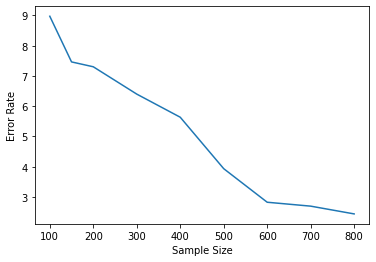

In [291]:
#4 graph
import matplotlib.pyplot as plt
x = [100, 150, 200, 300, 400, 500, 600, 700, 800]
y = [8.973144960092052, 7.4641333366376035, 7.303502507909793, 6.400524443087044, 5.636418661361796, 3.9363840581276786, 2.8273792961342137, 2.698320906773956, 2.4415482123139145]
plt.plot(x, y)
plt.xlabel("Sample Size")
plt.ylabel("Error Rate")
plt.show()

In [312]:
#5. Soru Cevabı

#iki adet komple null sütunu sildiğimiz için sütun çağırırken 9-14 değil 7-13 (sonuncuya varmıyor) arasını almamız gerek
#önceki veriler sayısal değer içermiyor istersek exception ile atlayabiliriz ancak verimlilik açısından direkt atladık

import math as m
sample_row_mean = []
df20_mean = []
sample_mean = []
samples = []
mean_error = 0
for month in range(months):
    samples.append([])
    sample_mean.append([])
    df20_mean.append([])
    for column in range(6):
        # her aya ve sütuna göre 800'lük sample'lar oluşturup diziye atadım
        try:
            samples[month].append(np.array(df20.loc[month + 1].iloc[:,7 + column].sample(n=800)))
        except:
            samples[month].append(None)
            
        # ortalamalarını aldım none değerlerde direkt exception alıyoruz, etkisiz olması için np.NaN verdik
        try:
            sample_mean[month].append(np.nanmean(samples[month][column]))
        except:
            sample_mean[month].append(np.NaN)

        #tüm datanın aylara göre sütun sütun ortalaması
        try:
            df20_mean[month].append(df20.loc[month + 1].iloc[:,7 + column].mean())
        except:
            df20_mean[month].append(np.NaN)

        
        mean_error += m.fabs(np.nansum(df20_mean[month][column] - sample_mean[month][column]))
# ortalama aldık      
error = mean_error / (9 * 6)

print("Error Rate For Each 800 Samples : ", error)


Error Rate For Each 800 Samples :  1.019716042686022


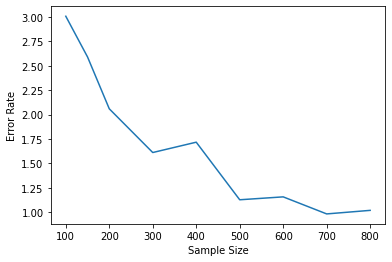

In [313]:
#5 Graph

import matplotlib.pyplot as plt
x = [100, 150, 200, 300, 400, 500, 600, 700, 800]
y = [3.005711687072915, 2.589250589363807, 2.058685244032765, 1.611381441631809, 1.7171821009804604, 1.1280352727942977, 1.1577449529295625, 0.9833334238611875, 1.019716042686022]
plt.plot(x, y)
plt.xlabel("Sample Size")
plt.ylabel("Error Rate")
plt.show()